In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
iris=pd.read_csv("Iris.csv")

In [82]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [83]:
iris["Species"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

We have three iris species for classfication task

Now we r going to covert those labels into numerical values

In [84]:
d={"Species":{'Iris-setosa':0.0,'Iris-versicolor':1.0,'Iris-virginica':2.0}}
iris.replace(d,inplace=True)   

In [85]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0.0
1,2,4.9,3.0,1.4,0.2,0.0
2,3,4.7,3.2,1.3,0.2,0.0
3,4,4.6,3.1,1.5,0.2,0.0
4,5,5.0,3.6,1.4,0.2,0.0


# Data Preprocessing

Now we r going to drop Id column(because its not  of any used here),then we r going to separate features and labels

In [86]:
iris.drop(["Id"],axis=1,inplace=True)

In [87]:
label=iris["Species"].values
iris.drop(["Species"],axis=1,inplace=True)

In [88]:
features=iris.values

Number of labels are equal in size so,infact of small data size train_test_split is not gonna create any bias(i have check it)

In [89]:
from sklearn import tree
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,label,train_size=0.8,random_state=42)

# Decision Tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
iris_clf=DecisionTreeClassifier()

In [91]:
iris_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [92]:
iris_clf.score(x_test,y_test)

1.0

Wow our classifier is performing 100% correct(Let check accuarcy using confusion matrix)

In [93]:
from sklearn.metrics import confusion_matrix
y_pred=iris_clf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

wow our classifier is 100% correct

In [94]:
import graphviz
data=tree.export_graphviz(iris_clf,filled=True)
graph=graphviz.Source(data)

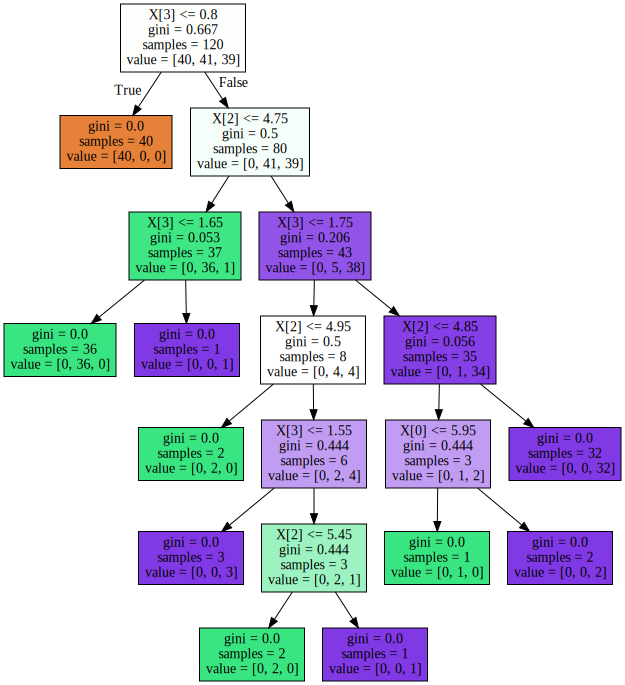

In [95]:
graph